# Regression linéaire

## Importation des dépendances

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk 
import sklearn.datasets
import matplotlib.pyplot as plt

## Fabrication de la dataset pour la regression linéaire

In [2]:
x_set, y_set, coef = sk.datasets.make_regression(n_features=1, n_samples=100, noise=10, 
                                                 random_state=0, coef=True)

y_set = y_set + abs(y_set/2)

## Analyse de la Dataset

In [3]:
dataset = pd.DataFrame.from_dict({'Données X': x_set.reshape(100,), 'Données Y': y_set})

### Affichage succint de la dataset

In [4]:
dataset

,Données X,Données Y
0,-0.359553,-9.977943
1,0.976639,32.009659
2,0.402342,17.335342
3,-0.813146,-8.171035
4,-0.887786,-17.850319
...,...,...
95,-1.165150,-24.221061
96,-0.362741,-0.233874
97,0.356366,17.676699
98,-1.613898,-26.382425


### Description rapide de la dataset

In [5]:
dataset.describe()

,Données X,Données Y
count,100.000000,100.000000
mean,0.059808,19.488877
std,1.012960,46.971348
min,-2.552990,-57.033957
25%,-0.643857,-13.343495
50%,0.094096,0.747775
75%,0.737077,45.795965
max,2.269755,143.620822


# Afficher la dataset

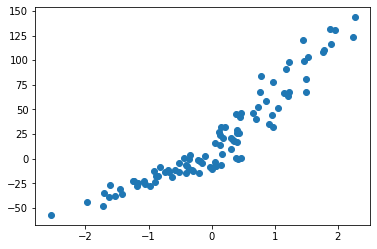

In [6]:
plt.scatter(x_set, y_set)

## Matrice X 

In [7]:
x_set.shape

(100, 1)

In [8]:
len_x_set = len(x_set)
x_set = x_set.reshape(len_x_set)

X = np.stack((x_set**2, x_set, np.ones(len_x_set)), axis=1)
X[0:5]

array([[ 0.12927848, -0.35955316,  1.        ],
       [ 0.95382381,  0.97663904,  1.        ],
       [ 0.1618788 ,  0.40234164,  1.        ],
       [ 0.66120688, -0.81314628,  1.        ],
       [ 0.78816353, -0.88778575,  1.        ]])

## Matrice Y

In [9]:
y_set.shape

(100,)

In [10]:
Y = y_set.reshape(len_x_set, 1)
Y[0:5]

array([[ -9.9779428 ],
       [ 32.00965907],
       [ 17.33534187],
       [ -8.17103459],
       [-17.85031924]])

## Vecteur Theta

In [11]:
np.random.seed(0)
theta = np.random.randn(3, 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

## Pour pouvoir faire une regression je vais utiliser une regression linéaire avec pour modèle ax+b 

In [12]:
def model(X, theta):
    return X.dot(theta)

## Fonction de calcul d'erreur

In [13]:
def cost(X, theta, Y):
    m = len(Y)
    
    return 1/(2*m) * np.sum((model(X, theta) - Y)**2)

In [14]:
cost(X, theta, Y)

1181.5228812416951

## Gradient 

In [15]:
def gradient(X, theta, Y):
    m = len(Y)
    
    return 1/m * X.T.dot(model(X, theta) - Y)

In [16]:
gradient(X, theta, Y)

array([[-33.84353788],
       [-44.35973383],
       [-16.68792479]])

## Descente du Gradient

In [17]:
def gradient_descent(X, theta, Y, learning_rate, n_iterations):
    cost_history = []
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, theta, Y)
        cost_history.append(cost(X, theta, Y))
        
    return cost_history, theta

## Entrainement

In [18]:
cost_history, theta_final = gradient_descent(X, theta, Y, 0.1, 200)

In [19]:
theta_final

array([[ 8.58813722],
       [42.23440187],
       [ 8.20808739]])

## Graphique du model dans la dataset avant entrainement

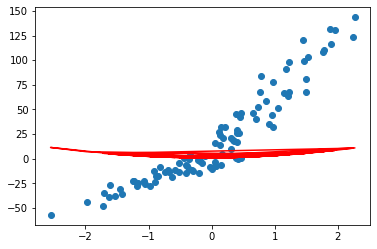

In [20]:
plt.scatter(x_set, y_set)
plt.plot(x_set, model(X, theta), c='r')

## Graphique du model dans la dataset après entrainement

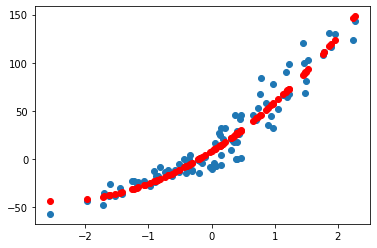

In [21]:
plt.scatter(x_set, y_set)
plt.scatter(x_set, model(X, theta_final), c='r')

## Evolution de l'erreur

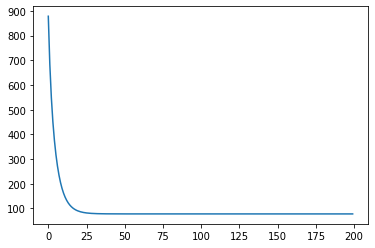

In [22]:
plt.plot(range(len(cost_history)), cost_history)

In [23]:
def coef_determination(Y, pred):
    u = ((Y - pred)**2).sum()
    v = ((Y - Y.mean())**2).sum()
    return 1 - u/v

In [24]:
coef_determination(Y, model(X, theta_final))

0.9287188615533358